# Tweet Analysis - Apple and Google

#### Author: Joseph Denney
#### Email: joseph.d.denney@gmail.com
#### github: www.github.com/josephdenney/Tweet_Analysis

## Introduction

### Problem and Purpose

#### A client is looking to design and manufacture a new smart phone and will invariably compete with Apple and Google products. They have provided us with a data set of Tweets and would like more detail regarding negatively and positively charged Tweets directed at both iPhone OS and Android OS phones. 
##### Our challenges are -
##### * 1. To highlight any negative features of iPhones and Androids so that they can reduce them in their new product and 
##### * 2. To highlight positive features of iPhones and Androids so that they can implement or improve them in their own product
##### * 3. To provide recommendations that will improve their future product

## Table of Contents
#### 1.3 EDA and Data Preprocessing
#### 1.4 Modeling
#### 1.5 Evaluate Models
#### 1.6 Keras Neural Network Binary Classifier
#### 1.7 NLP Using Word2Vec
#### 1.8 Keras Neural Network Multiple Classifier
#### 1.9 Question 1 and Recommendation
#### 1.10 Question 2 and Recommendation
#### 1.11 Question 3 and Recommendation

## EDA and Data Preprocessing

### Library, function, and data imports

In [39]:
import numpy as np
import pandas as pd
import spacy
import re
import nltk
import matplotlib.pyplot as plt
import logging
logging.basicConfig(format='%(asctime)s : %(levelname)s : %(message)s', 
                    level=logging.INFO)

from gensim.models import Word2Vec
from keras.models import Sequential
from keras.layers import Dense
from sklearn.preprocessing import MinMaxScaler, MaxAbsScaler
import seaborn as sns

from nltk.stem.wordnet import WordNetLemmatizer
import string
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
from sklearn.pipeline import Pipeline
from nltk.corpus import stopwords
from nltk import word_tokenize, FreqDist
from applesauce import model_scoring, cost_benefit_analysis, evaluate_model
from applesauce import model_opt, single_model_opt

from sklearn.metrics import classification_report, confusion_matrix 
from sklearn.metrics import plot_confusion_matrix, accuracy_score
from sklearn.metrics import precision_recall_curve, f1_score, precision_score
from sklearn.metrics import recall_score
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier 
from sklearn.ensemble import GradientBoostingClassifier 
from sklearn.naive_bayes import BernoulliNB, CategoricalNB, GaussianNB 
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer,CountVectorizer 
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.utils import resample

from keras.preprocessing.sequence import pad_sequences
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.preprocessing import text, sequence

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [52]:
nlp = spacy.load("en_core_web_sm")

In [53]:
print(stopwords)
print(nlp.Defaults.stop_words) 
# view list of stopwords

<WordListCorpusReader in 'C:\\Users\\josep\\AppData\\Roaming\\nltk_data\\corpora\\stopwords'>
{'forty', 'thereupon', 'hundred', 'sometime', 'whither', 'yet', 'its', 'nine', 'wherein', 'hence', 'whatever', 'then', '‘s', 'not', 'same', 'of', 'mostly', '’d', 'still', 'last', 'four', 'her', 'towards', 're', 'just', 'is', 'out', 'fifteen', 'becomes', '‘ve', 'we', 'somehow', 'his', 'get', 'thereby', 'at', 'in', 'serious', 'sometimes', 'beyond', 'please', 'another', 'who', 'ourselves', '‘d', 'mine', 'part', 'him', 'somewhere', 'per', 'move', 'therefore', 'our', '‘m', 'whom', "'ve", 'over', 'else', 'indeed', 'regarding', 'namely', 'from', 'whose', 'an', 'whence', 'ever', 'why', 'if', 'under', 'will', 'much', 'latterly', 'down', '’re', 'it', 'whereupon', 'other', 'five', 'show', 'are', 'there', 'also', 'which', 'and', 'many', 'them', 'or', 'well', 'most', 'about', 'was', 'former', 'should', 'always', 'thru', 'both', 'might', 'but', 'someone', 'unless', 'whether', 'up', 'hers', 'eight', 'had', '

In [54]:
df = pd.read_csv('data/product_tweets.csv',encoding='latin1')

In [55]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column                                              Non-Null Count  Dtype 
---  ------                                              --------------  ----- 
 0   tweet_text                                          9092 non-null   object
 1   emotion_in_tweet_is_directed_at                     3291 non-null   object
 2   is_there_an_emotion_directed_at_a_brand_or_product  9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [56]:
df.head()

,tweet_text,emotion_in_tweet_is_directed_at,is_there_an_emotion_directed_at_a_brand_or_product
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [57]:
df['emotion_in_tweet_is_directed_at'].unique()

array(['iPhone', 'iPad or iPhone App', 'iPad', 'Google', nan, 'Android',
       'Apple', 'Android App', 'Other Google product or service',
       'Other Apple product or service'], dtype=object)

In [58]:
df['emotion_in_tweet_is_directed_at'].count()

3291

### Data Exploration and Column Title Cleanup

In [59]:
df['is_there_an_emotion_directed_at_a_brand_or_product'].unique()

array(['Negative emotion', 'Positive emotion',
       'No emotion toward brand or product', "I can't tell"], dtype=object)

In [60]:
df = df.rename(columns= {'is_there_an_emotion_directed_at_a_brand_or_product'
                         :'Emotion',
                         'emotion_in_tweet_is_directed_at': 'Platform'})

In [61]:
df = df.rename(columns= {'tweet_text': 'Tweet'})

In [62]:
df.head() 

,Tweet,Platform,Emotion
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion


In [63]:
df.groupby(df['Platform']).count()

,Tweet,Emotion
Platform,,
Android,78,78
Android App,81,81
Apple,661,661
Google,430,430
Other Apple product or service,35,35
Other Google product or service,293,293
iPad,946,946
iPad or iPhone App,470,470
iPhone,297,297


### Dummify Target Column

In [64]:
df_dummify = pd.get_dummies(df['Emotion'])

In [65]:
df_dummify.head()

,I can't tell,Negative emotion,No emotion toward brand or product,Positive emotion
0,0,1,0,0
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,0,0,1


In [66]:
df_dummify.sum() # class bias 

I can't tell                           156
Negative emotion                       570
No emotion toward brand or product    5389
Positive emotion                      2978
dtype: int64

In [67]:
df.info()
df = pd.merge(df, df_dummify, how='outer',on=df.index) 
# ran this code, dummify emotion data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweet     9092 non-null   object
 1   Platform  3291 non-null   object
 2   Emotion   9093 non-null   object
dtypes: object(3)
memory usage: 213.2+ KB


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9093 entries, 0 to 9092
Data columns (total 8 columns):
 #   Column                              Non-Null Count  Dtype 
---  ------                              --------------  ----- 
 0   key_0                               9093 non-null   int64 
 1   Tweet                               9092 non-null   object
 2   Platform                            3291 non-null   object
 3   Emotion                             9093 non-null   object
 4   I can't tell                        9093 non-null   uint8 
 5   Negative emotion                    9093 non-null   uint8 
 6   No emotion toward brand or product  9093 non-null   uint8 
 7   Positive emotion                    9093 non-null   uint8 
dtypes: int64(1), object(3), uint8(4)
memory usage: 390.7+ KB


In [69]:
df.head()

,key_0,Tweet,Platform,Emotion,I can't tell,Negative emotion,No emotion toward brand or product,Positive emotion
0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,0,1,0,0
1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,0,0,0,1
2,2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,0,0,0,1
3,3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,0,1,0,0
4,4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,0,0,0,1


In [70]:
df = df.rename(columns = {"I can't tell": "Uncertain", 
                          'Negative emotion': 'Negative', 
                          'No emotion toward brand or product': 'No Emotion',
                          'Positive emotion':'Positive'})

In [71]:
df = df.drop(columns='key_0')
df.head()
df.to_csv('Full_DF')

In [72]:
corpus = list(df['Tweet']) # verify corpus list
corpus[:10]

['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
 "@jessedee Know about @fludapp ? Awesome iPad/iPhone app that you'll likely appreciate for its design. Also, they're giving free Ts at #SXSW",
 '@swonderlin Can not wait for #iPad 2 also. They should sale them down at #SXSW.',
 "@sxsw I hope this year's festival isn't as crashy as this year's iPhone app. #sxsw",
 "@sxtxstate great stuff on Fri #SXSW: Marissa Mayer (Google), Tim O'Reilly (tech books/conferences) &amp; Matt Mullenweg (Wordpress)",
 '@teachntech00 New iPad Apps For #SpeechTherapy And Communication Are Showcased At The #SXSW Conference http://ht.ly/49n4M #iear #edchat #asd',
 nan,
 '#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan',
 'Beautifully smart and simple idea RT @madebymany @thenextweb wrote about our #hollergram iPad app for #sxsw! http://bit.l

### Platform Negative Tweet Table

In [73]:
df.groupby(by=df['Platform']).sum()

,Uncertain,Negative,No Emotion,Positive
Platform,,,,
Android,0.0,8.0,1.0,69.0
Android App,0.0,8.0,1.0,72.0
Apple,2.0,95.0,21.0,543.0
Google,1.0,68.0,15.0,346.0
Other Apple product or service,0.0,2.0,1.0,32.0
Other Google product or service,1.0,47.0,9.0,236.0
iPad,4.0,125.0,24.0,793.0
iPad or iPhone App,0.0,63.0,10.0,397.0
iPhone,1.0,103.0,9.0,184.0


### Tokenize and Create Bag of Words

In [74]:
tokenz = word_tokenize(','.join(str(v) for v in corpus))

In [75]:
tokenz[:10]

['.', '@', 'wesley83', 'I', 'have', 'a', '3G', 'iPhone', '.', 'After']

### Create Stopwords List

In [76]:
stopword_list = list(nlp.Defaults.stop_words)
len(nlp.Defaults.stop_words)

326

In [77]:
stopword_list

['forty',
 'thereupon',
 'hundred',
 'sometime',
 'whither',
 'yet',
 'its',
 'nine',
 'wherein',
 'hence',
 'whatever',
 'then',
 '‘s',
 'not',
 'same',
 'of',
 'mostly',
 '’d',
 'still',
 'last',
 'four',
 'her',
 'towards',
 're',
 'just',
 'is',
 'out',
 'fifteen',
 'becomes',
 '‘ve',
 'we',
 'somehow',
 'his',
 'get',
 'thereby',
 'at',
 'in',
 'serious',
 'sometimes',
 'beyond',
 'please',
 'another',
 'who',
 'ourselves',
 '‘d',
 'mine',
 'part',
 'him',
 'somewhere',
 'per',
 'move',
 'therefore',
 'our',
 '‘m',
 'whom',
 "'ve",
 'over',
 'else',
 'indeed',
 'regarding',
 'namely',
 'from',
 'whose',
 'an',
 'whence',
 'ever',
 'why',
 'if',
 'under',
 'will',
 'much',
 'latterly',
 'down',
 '’re',
 'it',
 'whereupon',
 'other',
 'five',
 'show',
 'are',
 'there',
 'also',
 'which',
 'and',
 'many',
 'them',
 'or',
 'well',
 'most',
 'about',
 'was',
 'former',
 'should',
 'always',
 'thru',
 'both',
 'might',
 'but',
 'someone',
 'unless',
 'whether',
 'up',
 'hers',
 'eight',

In [78]:
stopword_list.extend(string.punctuation)

In [79]:
len(stopword_list)

358

In [80]:
stopword_list.extend(stopwords.words('english'))

In [81]:
len(stopword_list)

537

In [82]:
additional_punc = ['“','”','...',"''",'’','``','https','rt','\.+']
stopword_list.extend(additional_punc)
stopword_list[-10:]

["wouldn't", '“', '”', '...', "''", '’', '``', 'https', 'rt', '\\.+']

### Remove Stopwords and Additional Punctuation from the Data

In [83]:
stopped_tokenz = [word.lower() for word in tokenz if word.lower() 
                  not in stopword_list]

In [84]:
freq = FreqDist(stopped_tokenz)
freq.most_common(50)

[('sxsw', 9418),
 ('mention', 7120),
 ('link', 4313),
 ('google', 2593),
 ('ipad', 2432),
 ('apple', 2301),
 ('quot', 1696),
 ('iphone', 1516),
 ('store', 1472),
 ('2', 1114),
 ('new', 1090),
 ('austin', 959),
 ('amp', 836),
 ('app', 810),
 ('circles', 658),
 ('launch', 653),
 ('social', 647),
 ('android', 574),
 ('today', 574),
 ('network', 465),
 ('ipad2', 457),
 ('pop-up', 420),
 ('line', 405),
 ('free', 387),
 ('called', 361),
 ('party', 346),
 ('sxswi', 340),
 ('mobile', 338),
 ('major', 301),
 ('like', 290),
 ('time', 271),
 ('temporary', 264),
 ('opening', 257),
 ('possibly', 240),
 ('people', 226),
 ('downtown', 225),
 ('apps', 224),
 ('great', 222),
 ('maps', 219),
 ('going', 217),
 ('check', 216),
 ('mayer', 214),
 ('day', 214),
 ('open', 210),
 ('popup', 209),
 ('need', 205),
 ('marissa', 189),
 ('got', 185),
 ('w/', 182),
 ('know', 180)]

### Lemmatize the Data, Utilize Regex to Find and Remove URL's, Tags, other Misc

In [85]:
additional_misc = ['sxsw','mention',r'[a-zA-Z]+\'?s]',
                   r"(http[s]?://\w*\.\w*/+\w+)", r'\#\w*', 
                   r'RT [@]?\w*:', r'\@\w*',r"\d$",r"^\d",
                   r"([a-zA-Z]+(?:'[a-z]+)?)",r'\d.',r'\d','RT',
                   r'^http[s]?','za'] #[A-Z]{2,20} remove caps like MAGA and CDT
stopword_list.extend(additional_misc)
stopword_list.extend(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9'])

In [86]:
lemmatizer = WordNetLemmatizer()

In [87]:
clean_stopped_tokenz = [word.lower() for word in stopped_tokenz if word 
                        not in stopword_list]
clean_lemmatized_tokenz = [lemmatizer.lemmatize(word.lower()) for word 
                           in stopped_tokenz if word not in stopword_list]

In [40]:
freq_clean_lemma = FreqDist(clean_lemmatized_tokenz)
freq_lemma = freq_clean_lemma.most_common(5000)
freq_lemma2 = freq_clean_lemma.most_common(25)

In [41]:
total_word_count = len(clean_lemmatized_tokenz)

In [42]:
lemma_word_count = sum(freq_clean_lemma.values()) # just a number

In [43]:
for word in freq_lemma2: # separate both classes, positive and negative
    normalized_freq = word[1] / lemma_word_count
    print(word, "----", "{:.3f}".format(normalized_freq*100),"%")

('link', 4324) ---- 5.004 %
('google', 2594) ---- 3.002 %
('ipad', 2432) ---- 2.814 %
('apple', 2304) ---- 2.666 %
('quot', 1696) ---- 1.963 %
('iphone', 1516) ---- 1.754 %
('store', 1511) ---- 1.749 %
('new', 1090) ---- 1.261 %
('austin', 960) ---- 1.111 %
('amp', 836) ---- 0.967 %
('app', 810) ---- 0.937 %
('launch', 691) ---- 0.800 %
('circle', 673) ---- 0.779 %
('social', 647) ---- 0.749 %
('android', 574) ---- 0.664 %
('today', 574) ---- 0.664 %
('network', 473) ---- 0.547 %
('ipad2', 457) ---- 0.529 %
('line', 442) ---- 0.512 %
('pop-up', 422) ---- 0.488 %
('free', 387) ---- 0.448 %
('party', 386) ---- 0.447 %
('called', 361) ---- 0.418 %
('mobile', 340) ---- 0.393 %
('sxswi', 340) ---- 0.393 %


In [44]:
# from wordcloud import WordCloud

# ## Initalize a WordCloud with our stopwords_list and no bigrams
# wordcloud = WordCloud(stopwords=stopword_list,collocations=False)

# ## Generate wordcloud from stopped_tokens
# wordcloud.generate(','.join(clean_lemmatized_tokenz))

# ## Plot with matplotlib
# plt.figure(figsize = (12, 12), facecolor = None) 
# plt.imshow(wordcloud) 
# plt.axis('off')

In [45]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
tweet_finder = nltk.BigramCollocationFinder.from_words(clean_lemmatized_tokenz)
tweets_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)

In [46]:
word_pairs = pd.DataFrame(tweets_scored, columns=["Word","Freq"]).head(20)
word_pairs

,Word,Freq
0,"(apple, store)",0.006920
1,"(social, network)",0.005277
2,"(new, social)",0.004837
3,"(google, launch)",0.003912
4,"(link, google)",0.003877
5,"(network, called)",0.003784
6,"(called, circle)",0.003634
7,"(today, link)",0.003437
8,"(major, new)",0.003356
9,"(iphone, app)",0.003333


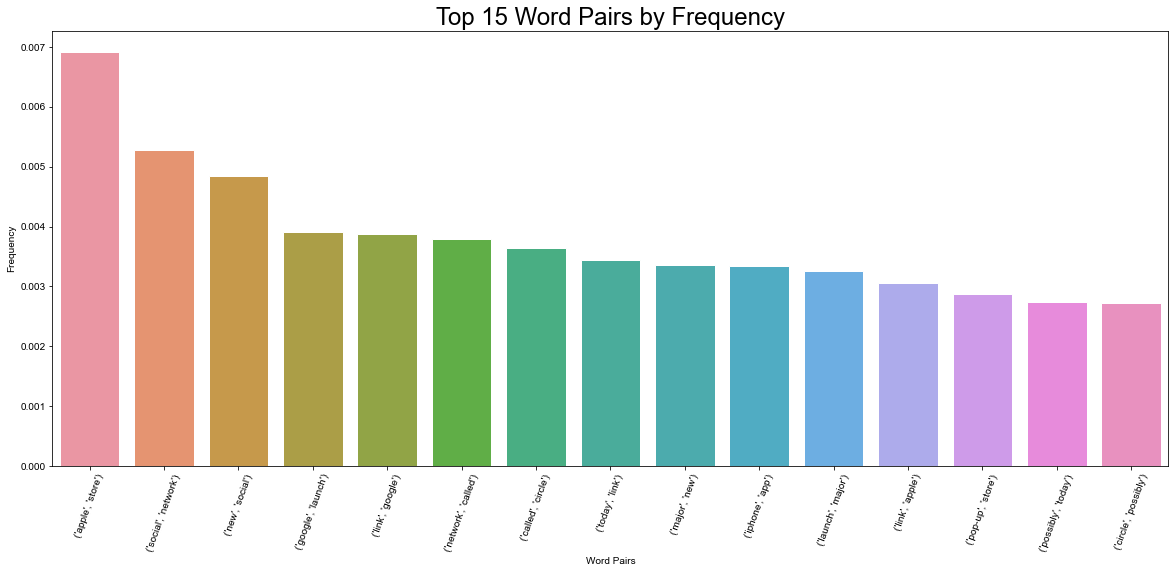

In [47]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=2)
sns.set_style("darkgrid")
palette = sns.set_palette("dark")
ax = sns.barplot(x=word_pairs.head(15)['Word'], y=word_pairs.head(15)['Freq'],
                 palette=palette)
ax.set(xlabel="Word Pairs",ylabel="Frequency")
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=70)
plt.title('Top 15 Word Pairs by Frequency')
plt.show()

In [48]:
tweet_pmi_finder = nltk.BigramCollocationFinder.from_words(clean_lemmatized_tokenz)
tweet_pmi_finder.apply_freq_filter(5)

tweet_pmi_scored = tweet_pmi_finder.score_ngrams(bigram_measures.pmi)

In [49]:
PMI_list = pd.DataFrame(tweet_pmi_scored, columns=["Words","PMI"]).head(20)
PMI_list = PMI_list[PMI_list.PMI < 14]
PMI_list

,Words,PMI
1,"(jc, penney)",13.813948
2,"(knitted, staircase)",13.813948
3,"(naomi, campbell)",13.813948
4,"(parking, 5-10)",13.813948
5,"(pauly, celebs)",13.813948
6,"(98, accuracy)",13.591556
7,"(aron, pilhofer)",13.591556
8,"(charlie, sheen)",13.591556
9,"(lynn, teo)",13.591556
10,"(sheen, goddess)",13.591556


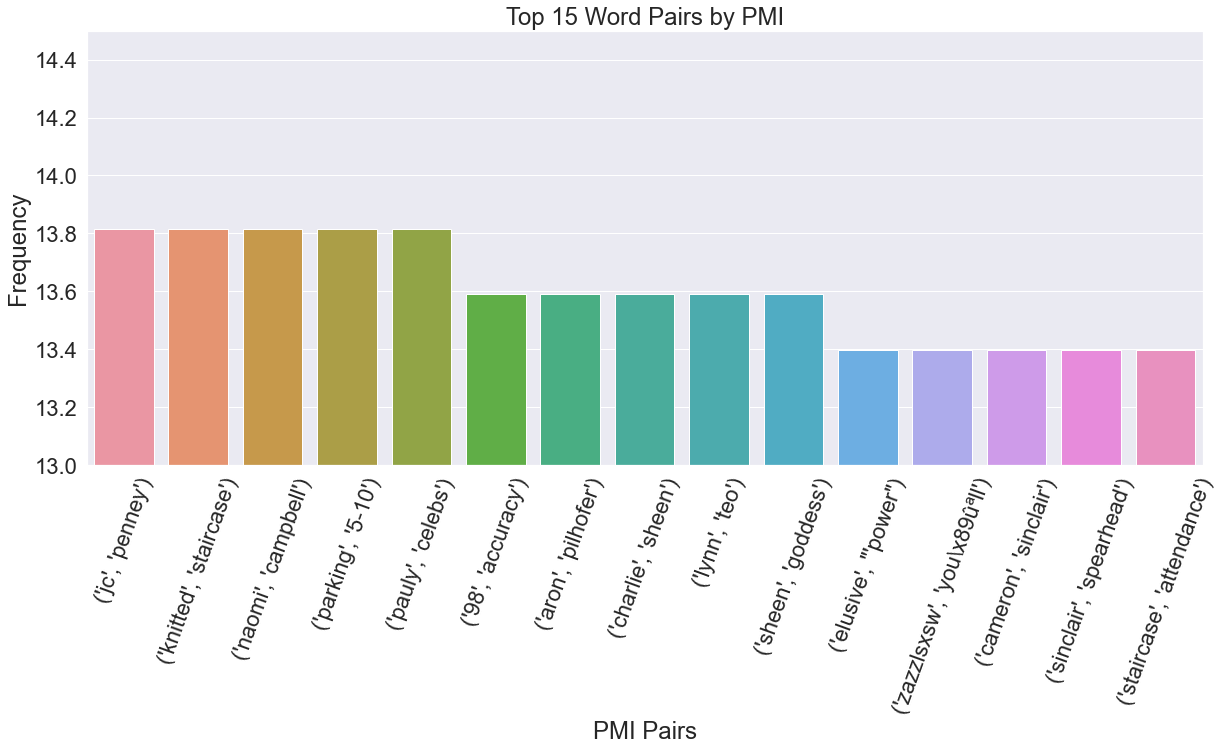

In [50]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=2)
sns.set_style("darkgrid")
palette = sns.set_palette("dark")
ax = sns.barplot(x=PMI_list.head(15)['Words'], y=PMI_list.head(15)['PMI'], 
                 palette=palette)
ax.set(xlabel="PMI Pairs",ylabel="Frequency")
plt.ylim([13,14.5])
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=70)
plt.title('Top 15 Word Pairs by PMI')
plt.show()

In [51]:
df1 = df
df.head()

,Tweet,Platform,Emotion,Uncertain,Negative,No Emotion,Positive
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,0,1,0,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,0,0,0,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,0,0,0,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,0,1,0,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,0,0,0,1


In [52]:
df1 = df1.drop(columns=['Uncertain','No Emotion'])
# Turn negative and positive columns into one column of just negatives 
# and positive.
df1 = df1[df1['Emotion'] != "No emotion toward brand or product"]
df1 = df1[df1['Emotion'] != "I can't tell"]
df1 = df1.drop(columns='Negative')
df1 = df1.rename(columns={'Positive': 'Positive_Bin'})
df1.head()

,Tweet,Platform,Emotion,Positive_Bin
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,1


In [53]:
df1.to_csv('Tweet.csv')

### Create Upsampled Data

In [54]:
df_majority = df1.loc[df1['Positive_Bin']==1]
df_minority = df1.loc[df1['Positive_Bin']==0]

In [55]:
df_minority.shape

(570, 4)

In [56]:
df_majority.shape

(2978, 4)

In [57]:
df_min_sample = resample(df_minority, replace=True, n_samples=1000, 
                         random_state=42)

In [58]:
df_maj_sample = resample(df_majority, replace=True, n_samples=2500, 
                         random_state=42)

In [59]:
df_upsampled = pd.concat([df_min_sample, df_maj_sample], axis=0)
df_upsampled.shape

(3500, 4)

In [60]:
X, y = df_upsampled['Tweet'], df_upsampled['Positive_Bin']

In [61]:
df_upsampled.to_csv('Upsampled.csv')

## Modeling

### Train/Test Split

In [62]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [63]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3548 entries, 0 to 9088
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tweet         3548 non-null   object
 1   Platform      3191 non-null   object
 2   Emotion       3548 non-null   object
 3   Positive_Bin  3548 non-null   uint8 
dtypes: object(3), uint8(1)
memory usage: 114.3+ KB


In [64]:
y_train.value_counts(0)
y_test.value_counts(1)

2020-12-23 10:29:17,902 : INFO : NumExpr defaulting to 8 threads.


1    0.683429
0    0.316571
Name: Positive_Bin, dtype: float64

### Vectorize, Lemmatize with Count Vectorizer and Tf Idf

In [65]:
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer, TfidfTransformer
from sklearn.ensemble import RandomForestClassifier

tokenizer = nltk.TweetTokenizer(preserve_case=False)

vectorizer = CountVectorizer(tokenizer=tokenizer.tokenize,
                             stop_words=stopword_list,decode_error='ignore')

In [66]:
X_train_count = vectorizer.fit_transform(X_train)
X_test_count = vectorizer.transform(X_test)

C:\Users\josep\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [":'[", ':/', 'a-z', 'a-za-z', 'http', 'n', 'w', '‘'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


### MaxAbsScaler

In [67]:
scaler_object = MaxAbsScaler().fit(X_train_count)

In [68]:
scaler_object.transform(X_train_count)

<2625x4295 sparse matrix of type '<class 'numpy.float64'>'
	with 28229 stored elements in Compressed Sparse Row format>

In [69]:
scaler_object.transform(X_test_count)

<875x4295 sparse matrix of type '<class 'numpy.float64'>'
	with 8854 stored elements in Compressed Sparse Row format>

### Instantiate Model

In [70]:
ran_for = RandomForestClassifier(class_weight='balanced')
model = ran_for.fit(X_train_count, y_train)

In [71]:
y_hat_test = model.predict(X_test_count)

## Evaluate Models
#### 1 denotes a Positive Tweet, 0 denotes a Negative Tweet

### Random Forest with Count Vectorizer

              precision    recall  f1-score   support

           0       0.97      0.84      0.90       277
           1       0.93      0.99      0.96       598

    accuracy                           0.94       875
   macro avg       0.95      0.91      0.93       875
weighted avg       0.94      0.94      0.94       875



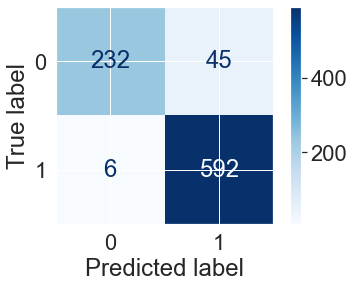

In [72]:
evaluate_model(y_test, y_hat_test, X_test_count,clf=model) 
# 1 denotes Positive Tweet

#### Basic Random Forest model performs well after preprocessing with high precision and f1-scores. 

In [73]:
tf_idf_vectorizer = TfidfVectorizer(tokenizer=tokenizer.tokenize,
                                    stop_words=stopword_list,
                                    decode_error='ignore')

In [74]:
X_train_tf_idf = tf_idf_vectorizer.fit_transform(X_train)
X_test_tf_idf = tf_idf_vectorizer.transform(X_test)
print(X_train_tf_idf.shape)
print(y_train.shape)

C:\Users\josep\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens [":'[", ':/', 'a-z', 'a-za-z', 'http', 'n', 'w', '‘'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '


(2625, 4295)
(2625,)


In [75]:
from sklearn.ensemble import RandomForestClassifier

In [76]:
ran_for = RandomForestClassifier(class_weight='balanced')
model_tf_idf = ran_for.fit(X_train_tf_idf,y_train)

In [77]:
y_hat_tf_idf = model_tf_idf.predict(X_test_count)

### Random Forest with Tf-Idf Vectorizer

              precision    recall  f1-score   support

           0       0.91      0.64      0.75       277
           1       0.85      0.97      0.91       598

    accuracy                           0.87       875
   macro avg       0.88      0.81      0.83       875
weighted avg       0.87      0.87      0.86       875



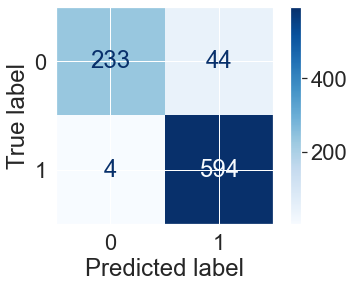

In [78]:
evaluate_model(y_test, y_hat_tf_idf, X_test_tf_idf,clf=model_tf_idf) 

### Multiple Models, CountVectorizer

Accuracy Score:  0.9314285714285714
Precision Score:  0.9177018633540373
Recall Score:  0.9882943143812709
F1 Score:  0.9516908212560387
RandomForestClassifier()   0.9314285714285714


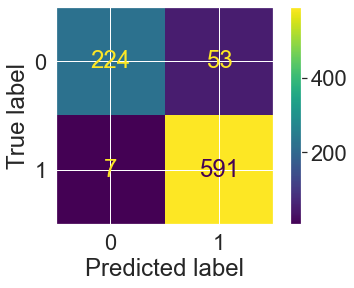

Accuracy Score:  0.7691428571428571
Precision Score:  0.7661290322580645
Recall Score:  0.9531772575250836
F1 Score:  0.849478390461997
AdaBoostClassifier()   0.7691428571428571


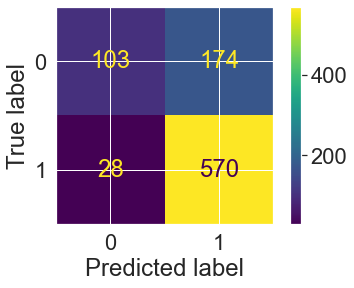

Accuracy Score:  0.7794285714285715
Precision Score:  0.7592829705505761
Recall Score:  0.9916387959866221
F1 Score:  0.8600435097897027
GradientBoostingClassifier()   0.7794285714285715


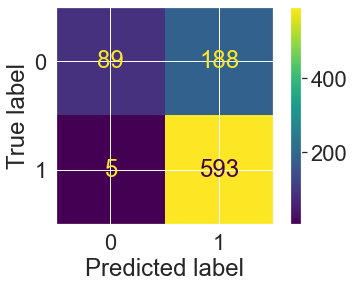

In [79]:
ran_for = RandomForestClassifier()
ada_clf = AdaBoostClassifier()
gb_clf = GradientBoostingClassifier()

models = [ran_for, ada_clf, gb_clf]

for model in models:
    single_model_opt(model, X_train_count, y_train, X_test_count, y_test)

### Multiple Models, Tf-Idf Vectorizer

Accuracy Score:  0.9337142857142857
Precision Score:  0.9192546583850931
Recall Score:  0.9899665551839465
F1 Score:  0.9533011272141707
RandomForestClassifier()   0.9337142857142857


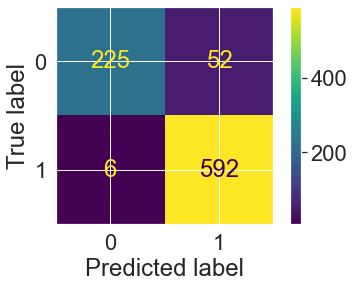

Accuracy Score:  0.7782857142857142
Precision Score:  0.7797783933518005
Recall Score:  0.9414715719063546
F1 Score:  0.8530303030303031
AdaBoostClassifier()   0.7782857142857142


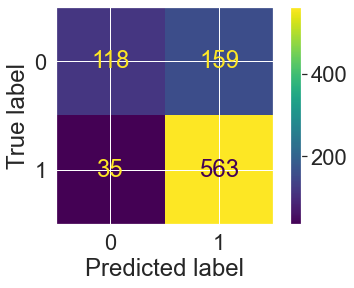

Accuracy Score:  0.7817142857142857
Precision Score:  0.7639429312581063
Recall Score:  0.9849498327759197
F1 Score:  0.8604821037253471
GradientBoostingClassifier()   0.7817142857142857


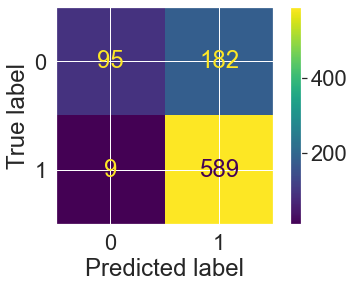

In [80]:
for model in models:
    single_model_opt(model, X_train_tf_idf, y_train, X_test_tf_idf, y_test)

In [81]:
tf_idf_vectorizer.get_feature_names()

['##sxsw',
 '#10',
 '#106',
 '#11ntc',
 '#1406-08',
 '#15slides',
 '#310409h2011',
 '#4sq',
 '#911tweets',
 '#abacus',
 '#accesssxsw',
 '#accordion',
 '#aclu',
 '#adam',
 '#addictedtotheinterwebs',
 '#adpeopleproblems',
 '#agchat',
 '#agileagency',
 '#agnerd',
 '#allhat3',
 '#alwayshavingtoplugin',
 '#amateurhour',
 '#android',
 "#android's",
 '#androidsxsw',
 '#angrybirds',
 '#annoying',
 '#app',
 '#appcircus',
 '#apple',
 "#apple's",
 '#apple_store',
 '#appleatxdt',
 '#applefanatic',
 '#appletakingoverworld',
 '#apps',
 '#appstore',
 '#art',
 '#assistivetech',
 '#at',
 '#atl',
 '#att',
 '#atx',
 '#atzip',
 '#augcomm',
 '#aus',
 '#austin',
 '#austincrowd',
 '#austinwins',
 '#ausxsw',
 '#bankinnovate',
 '#bankinnovation',
 '#barrydiller',
 '#batterykiller',
 '#battlela',
 '#bavcid',
 '#bawling',
 '#bbq',
 '#behance',
 '#bestappever',
 '#betainvites',
 '#bettercloud',
 '#bettersearch',
 '#betterthingstodo',
 '#beyondwc',
 '#bing',
 '#bizzy',
 '#blackberry',
 '#boom',
 '#booyah',
 '#brai

In [82]:
importance = pd.Series(ran_for.feature_importances_,
                       index=tf_idf_vectorizer.get_feature_names())
importance = pd.DataFrame(importance).sort_values(by=0,ascending=False)

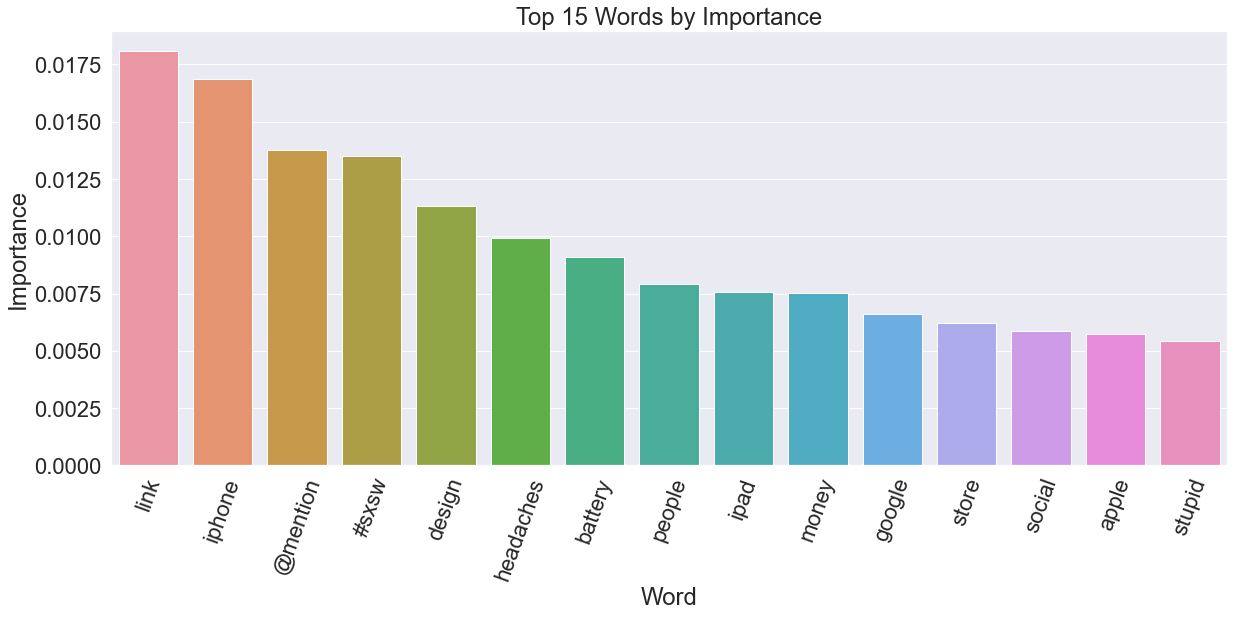

In [83]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=2)
sns.set_style("darkgrid")
palette = sns.set_palette("dark")
ax = sns.barplot(x=importance.head(15).index, y=importance.head(15)[0], 
                 palette=palette)
ax.set(xlabel="Word",ylabel="Importance")
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=70)
plt.title('Top 15 Words by Importance')
plt.show() 

### Pipeline and GridSearchCV

In [84]:
vectorizer = CountVectorizer()
tf_transform = TfidfTransformer(use_idf=True)

In [85]:
text_pipe = Pipeline(steps=[
    ('count_vectorizer',vectorizer),
    ('tf_transformer',tf_transform)])

In [86]:
RandomForestClassifier(class_weight='balanced')

RandomForestClassifier(class_weight='balanced')

In [87]:
full_pipe = Pipeline(steps=[
    ('text_pipe',text_pipe),
    ('clf',RandomForestClassifier(class_weight='balanced'))
])

In [88]:
X_train_pipe = text_pipe.fit_transform(X_train)

In [89]:
X_test_pipe = text_pipe.transform(X_test)

In [90]:
X_train_pipe

<2625x4256 sparse matrix of type '<class 'numpy.float64'>'
	with 44273 stored elements in Compressed Sparse Row format>

In [91]:
params = {'text_pipe__tf_transformer__use_idf':[True, False],
         'text_pipe__count_vectorizer__tokenizer':[None,tokenizer.tokenize],
         'text_pipe__count_vectorizer__stop_words':[None,stopword_list],
         'clf__criterion':['gini', 'entropy']}

In [92]:
## Make and fit grid
grid = GridSearchCV(full_pipe,params,cv=3)
grid.fit(X_train,y_train)
## Display best params
grid.best_params_

C:\Users\josep\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['http'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\josep\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['http'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\josep\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with your preprocessing. Tokenizing the stop words generated tokens ['http'] not in stop_words.
  warnings.warn('Your stop_words may be inconsistent with '
C:\Users\josep\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:383: UserWarning: Your stop_words may be inconsistent with

{'clf__criterion': 'gini',
 'text_pipe__count_vectorizer__stop_words': ['she',
  'enough',
  'about',
  'than',
  'four',
  'down',
  'without',
  'them',
  'thence',
  'see',
  'some',
  'amount',
  'whatever',
  'meanwhile',
  'serious',
  'whereas',
  'such',
  'have',
  'although',
  'then',
  '’m',
  'through',
  'via',
  'thereby',
  'elsewhere',
  'along',
  'above',
  'thereafter',
  'on',
  'both',
  'everything',
  'get',
  'much',
  'least',
  "'re",
  'his',
  'each',
  'everyone',
  'last',
  'perhaps',
  'really',
  'latter',
  'neither',
  'being',
  'yet',
  'anyway',
  'forty',
  'whether',
  'noone',
  'keep',
  're',
  'almost',
  'five',
  'may',
  'were',
  'take',
  'whoever',
  'unless',
  'besides',
  'beside',
  '’re',
  'against',
  'here',
  'behind',
  'somewhere',
  'this',
  'n‘t',
  'formerly',
  'between',
  'used',
  'had',
  'even',
  'rather',
  'all',
  'twenty',
  'below',
  'due',
  'except',
  'and',
  'empty',
  'up',
  'ourselves',
  '’s',
  'no

In [93]:
best_pipe = grid.best_estimator_
y_hat_test = grid.predict(X_test)

              precision    recall  f1-score   support

           0       0.96      0.86      0.91       277
           1       0.94      0.98      0.96       598

    accuracy                           0.94       875
   macro avg       0.95      0.92      0.93       875
weighted avg       0.94      0.94      0.94       875



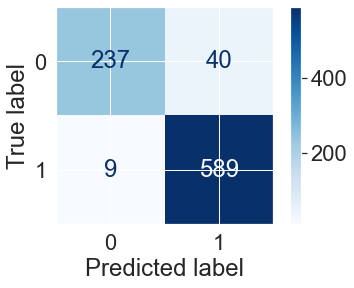

In [94]:
evaluate_model(y_test,y_hat_test,X_test,best_pipe)

In [95]:
X_train_pipe.shape

(2625, 4256)

### Bigram Frequency

In [96]:
features = text_pipe.named_steps['count_vectorizer'].get_feature_names()
features[:10]

['000', '02', '03', '0310apple', '08', '10', '100', '100s', '101', '106']

In [97]:
bigram_measures = nltk.collocations.BigramAssocMeasures()
tweet_finder = nltk.BigramCollocationFinder.from_words(clean_lemmatized_tokenz)
tweets_scored = tweet_finder.score_ngrams(bigram_measures.raw_freq)

In [98]:
bigram1 = pd.DataFrame(tweets_scored, columns=['Words','Freq'])
bigram1.head()

,Words,Freq
0,"(apple, store)",0.006920
1,"(social, network)",0.005277
2,"(new, social)",0.004837
3,"(google, launch)",0.003912
4,"(link, google)",0.003877


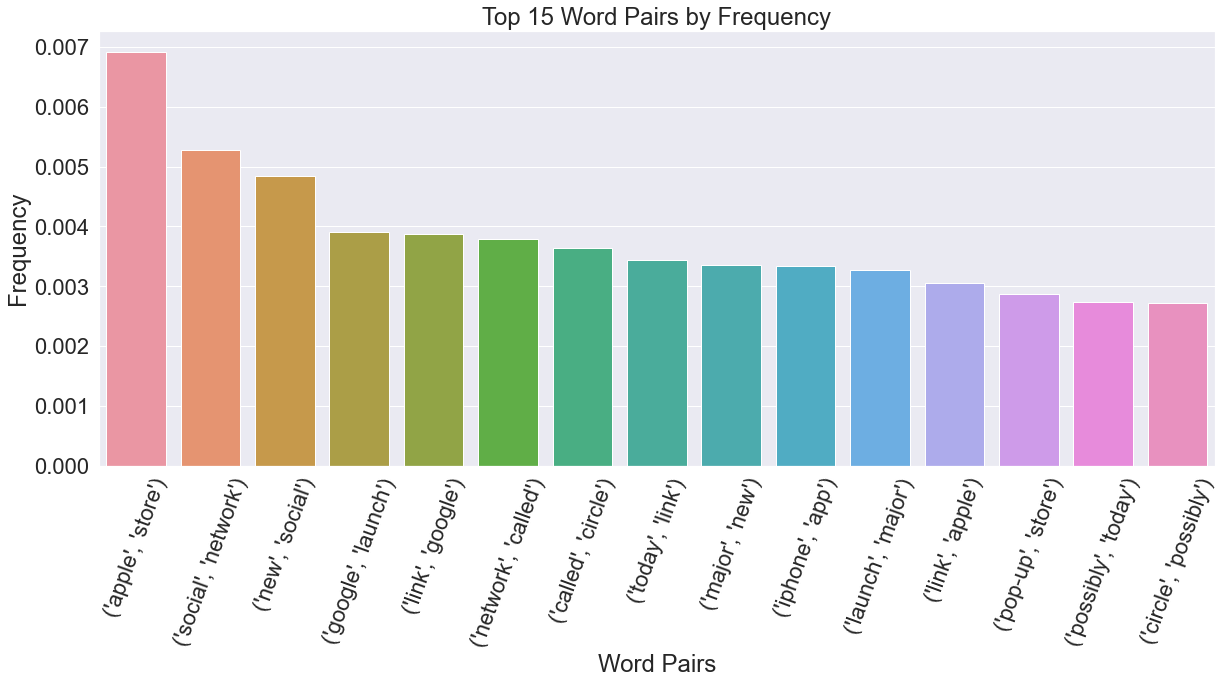

In [111]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=2)
sns.set_style("darkgrid")
palette = sns.set_palette("dark")
ax = sns.barplot(x=bigram1.head(15)['Words'], y=bigram1.head(15)['Freq'], 
                 palette=palette)
ax.set(xlabel="Word Pairs",ylabel="Frequency")
plt.ticklabel_format(style='plain',axis='y')
plt.xticks(rotation=70)
plt.title('Top 15 Word Pairs by Frequency')
plt.show() 

## Keras NN Binary Classification

In [99]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import models, layers, optimizers

In [100]:
model = 0

### Tokenize Upsampled Tweets

In [101]:
tweets = df_upsampled['Tweet']
tokenizer = Tokenizer(num_words=10000)
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)
print('sequences type: ' , type(sequences))

sequences type:  <class 'list'>


In [102]:
one_hot_results = tokenizer.texts_to_matrix(tweets, mode='binary')
print('one_hot_results type:', type(one_hot_results))
one_hot_results = np.asarray(one_hot_results)

one_hot_results type: <class 'numpy.ndarray'>


In [103]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index)) 

Found 4816 unique tokens.


In [104]:
print('Dimensions of our coded results:', np.shape(one_hot_results)) 

Dimensions of our coded results: (3500, 10000)


In [105]:
y = df_upsampled['Positive_Bin']

In [106]:
y = np.asarray(y)

In [107]:
print(y.shape)
print(one_hot_results.shape)

(3500,)
(3500, 10000)


In [108]:
print(len(y))

3500


In [109]:
import random

In [112]:
random.seed(42)
test_index = list(random.sample(range(1,3200),2000))

test = np.asarray(one_hot_results[test_index])
train = np.delete(one_hot_results, test_index, 0) 

label_test = y[test_index]
label_train = np.delete(y, test_index, 0)

print('Test label shape:', np.shape(label_test))
print('Train label shape:', np.shape(label_train))
print('Test shape:', np.shape(test))
print('Train shape:', np.shape(train))

Test label shape: (2000,)
Train label shape: (1500,)
Test shape: (2000, 10000)
Train shape: (1500, 10000)


In [113]:
tokenizer.word_counts

OrderedDict([('at', 1127),
             ('sxsw', 3630),
             ('tapworthy', 44),
             ('ipad', 1213),
             ('design', 89),
             ('headaches', 41),
             ('avoiding', 3),
             ('the', 1847),
             ('pitfalls', 3),
             ('of', 753),
             ('new', 357),
             ('challenges', 3),
             ('rt', 1000),
             ('mention', 2312),
             ('part', 12),
             ('journalsim', 5),
             ('is', 883),
             ('support', 15),
             ('democracy', 5),
             ('yes', 47),
             ('informed', 5),
             ('populous', 5),
             ('as', 128),
             ('a', 983),
             ('focus', 7),
             ('does', 40),
             ('not', 232),
             ('that', 249),
             ('newsapps', 17),
             ('fuck', 8),
             ('iphone', 763),
             ('ubersocial', 23),
             ('for', 1015),
             ('now', 151),
             ('in', 711

In [114]:
print(type(X),X.shape)
print(type(y),y.shape)

<class 'pandas.core.series.Series'> (3500,)
<class 'numpy.ndarray'> (3500,)


### Build Neural Network Model with Sigmoid Activation

In [115]:
# Initialize a sequential model
model = []
model = models.Sequential()
# Two layers with relu activation
model.add(layers.Dense(32, activation='relu', input_shape=(10000,)))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['acc'])

In [116]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                320032    
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 17        
Total params: 320,577
Trainable params: 320,577
Non-trainable params: 0
_________________________________________________________________


In [117]:
train.shape

(1500, 10000)

In [118]:
label_train.shape

(1500,)

### Run Model

In [119]:
history = model.fit(train, label_train, batch_size=32, epochs=20, verbose=2, 
                    validation_split=.2)

Epoch 1/20
38/38 - 1s - loss: 0.6205 - acc: 0.6908 - val_loss: 0.3322 - val_acc: 1.0000
Epoch 2/20
38/38 - 0s - loss: 0.4580 - acc: 0.7767 - val_loss: 0.2384 - val_acc: 0.9800
Epoch 3/20
38/38 - 0s - loss: 0.2799 - acc: 0.9208 - val_loss: 0.1912 - val_acc: 0.9633
Epoch 4/20
38/38 - 0s - loss: 0.1385 - acc: 0.9733 - val_loss: 0.1473 - val_acc: 0.9500
Epoch 5/20
38/38 - 0s - loss: 0.0633 - acc: 0.9933 - val_loss: 0.1253 - val_acc: 0.9567
Epoch 6/20
38/38 - 0s - loss: 0.0304 - acc: 0.9975 - val_loss: 0.1498 - val_acc: 0.9133
Epoch 7/20
38/38 - 0s - loss: 0.0166 - acc: 1.0000 - val_loss: 0.1411 - val_acc: 0.9200
Epoch 8/20
38/38 - 0s - loss: 0.0101 - acc: 1.0000 - val_loss: 0.1322 - val_acc: 0.9267
Epoch 9/20
38/38 - 0s - loss: 0.0070 - acc: 1.0000 - val_loss: 0.1541 - val_acc: 0.9133
Epoch 10/20
38/38 - 0s - loss: 0.0050 - acc: 1.0000 - val_loss: 0.1688 - val_acc: 0.9100
Epoch 11/20
38/38 - 0s - loss: 0.0038 - acc: 1.0000 - val_loss: 0.1384 - val_acc: 0.9267
Epoch 12/20
38/38 - 0s - loss:

### Training and Validation Graphs

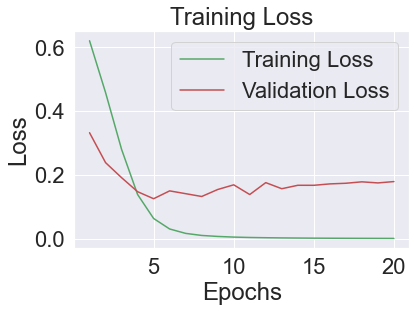

In [120]:
history_dict = history.history
loss_values = history_dict['loss']
loss_valid = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, loss_valid, 'r', label='Validation Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

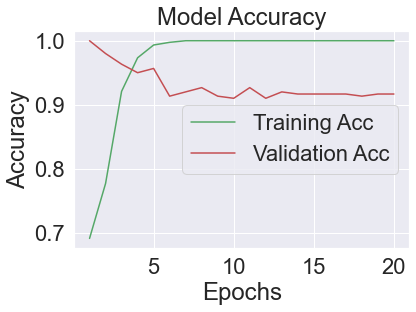

In [121]:
# Plot the training accuracy vs the number of epochs

acc_values = history_dict['acc'] 
acc_valid = history_dict['val_acc'] 

plt.figure()

plt.plot(epochs, acc_values, 'g', label='Training Acc')
plt.plot(epochs, acc_valid, 'r', label='Validation Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='right')
plt.show()

## NLP using Word2Vec

In [122]:
from nltk import word_tokenize

### Tokenize Tweets

In [123]:
data = df_upsampled['Tweet'].map(word_tokenize)

In [124]:
data[:10]

1749    [At, #, sxsw, #, tapworthy, iPad, Design, Head...
6436    [RT, @, mention, Part, of, Journalsim, is, the...
3838    [Fuck, the, iphone, !, RT, @, mention, New, #,...
1770    [#, SXSW, 2011, :, Novelty, of, iPad, news, ap...
1062    [New, #, SXSW, rule, :, no, more, ooing, and, ...
324     [Overheard, at, #, sxsw, interactive, :, &, qu...
1944    [#, virtualwallet, #, sxsw, no, NFC, in, #, ip...
7201    [#, SXSW, a, tougher, crowd, than, Colin, Quin...
3159    [Why, is, wifi, working, on, my, laptop, but, ...
4631    [Is, starting, to, think, my, #, blackberry, i...
Name: Tweet, dtype: object

### Create Word2Vec Model

In [125]:
model_W2V = Word2Vec(data, size =100, window=5, min_count=1, workers=4)

2020-12-23 10:32:22,951 : INFO : collecting all words and their counts
2020-12-23 10:32:22,952 : INFO : PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
2020-12-23 10:32:22,972 : INFO : collected 5920 word types from a corpus of 86715 raw words and 3500 sentences
2020-12-23 10:32:22,973 : INFO : Loading a fresh vocabulary
2020-12-23 10:32:22,986 : INFO : effective_min_count=1 retains 5920 unique words (100% of original 5920, drops 0)
2020-12-23 10:32:22,987 : INFO : effective_min_count=1 leaves 86715 word corpus (100% of original 86715, drops 0)
2020-12-23 10:32:23,005 : INFO : deleting the raw counts dictionary of 5920 items
2020-12-23 10:32:23,006 : INFO : sample=0.001 downsamples 52 most-common words
2020-12-23 10:32:23,006 : INFO : downsampling leaves estimated 56808 word corpus (65.5% of prior 86715)
2020-12-23 10:32:23,022 : INFO : estimated required memory for 5920 words and 100 dimensions: 7696000 bytes
2020-12-23 10:32:23,022 : INFO : resetting layer weights
2

In [126]:
model_W2V.train(data,total_examples=model_W2V.corpus_count, epochs=10)

2020-12-23 10:32:24,400 : WARNING : Effective 'alpha' higher than previous training cycles
2020-12-23 10:32:24,401 : INFO : training model with 4 workers on 5920 vocabulary and 100 features, using sg=0 hs=0 sample=0.001 negative=5 window=5
2020-12-23 10:32:24,446 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-12-23 10:32:24,451 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-12-23 10:32:24,455 : INFO : worker thread finished; awaiting finish of 1 more threads
2020-12-23 10:32:24,457 : INFO : worker thread finished; awaiting finish of 0 more threads
2020-12-23 10:32:24,458 : INFO : EPOCH - 1 : training on 86715 raw words (56688 effective words) took 0.1s, 1132709 effective words/s
2020-12-23 10:32:24,507 : INFO : worker thread finished; awaiting finish of 3 more threads
2020-12-23 10:32:24,513 : INFO : worker thread finished; awaiting finish of 2 more threads
2020-12-23 10:32:24,514 : INFO : worker thread finished; awaiting finish of 1 mo

(567810, 867150)

In [127]:
wv = model_W2V.wv

In [128]:
wv.most_similar(positive='phone')

2020-12-23 10:32:25,357 : INFO : precomputing L2-norms of word weight vectors


[('Ubuntu', 0.9763219356536865),
 ('3g', 0.9685029983520508),
 ('tweeted', 0.9618393182754517),
 ('Qrank', 0.959566593170166),
 ('horrendous', 0.958916187286377),
 ('words', 0.9553130865097046),
 ('bluetooth', 0.9540582895278931),
 ('leather', 0.951541543006897),
 ('Thursday', 0.9499979615211487),
 ('cases', 0.9488207101821899)]

In [129]:
wv['help']

array([-0.05602682,  0.1898873 , -0.04284276, -0.09649099, -0.0919168 ,
        0.15212974,  0.19682896,  0.21751685, -0.03360185, -0.24705708,
        0.08084903,  0.00062578,  0.11321343, -0.03866779,  0.06944523,
        0.04494823,  0.02281479, -0.06902155,  0.06123722,  0.01340639,
       -0.11258984,  0.10590371, -0.04277435, -0.29310337,  0.12547119,
        0.26872963, -0.15748288,  0.0803702 , -0.03750943,  0.13433443,
        0.14194822,  0.1628125 ,  0.11665671,  0.35196766, -0.00845829,
       -0.18044046,  0.05874589, -0.13683037, -0.03252002, -0.08289275,
       -0.35061875,  0.09212191, -0.1106097 ,  0.21421194, -0.02004252,
       -0.06794347,  0.14174776, -0.00507101,  0.44819406,  0.11436772,
        0.20344055, -0.11549824,  0.39827913,  0.0403868 , -0.21902487,
       -0.10420201, -0.1485029 ,  0.04777614,  0.1415703 ,  0.09671021,
       -0.10265251, -0.01838774, -0.24499744, -0.03473309, -0.02861528,
        0.31340402,  0.02488031,  0.14073284, -0.18057962, -0.09

In [130]:
wv.vectors

array([[ 2.76873916e-01,  1.83803201e-01,  2.84476489e-01, ...,
        -1.05843592e+00,  1.04563355e+00, -1.01885712e+00],
       [ 2.99914071e-04,  1.38045833e-01,  2.80075252e-01, ...,
        -5.56849182e-01,  9.46540236e-01, -2.01369002e-01],
       [ 2.78386146e-01,  5.39122336e-02, -3.57363671e-01, ...,
         7.83293486e-01,  1.70851719e+00, -1.23066807e+00],
       ...,
       [ 1.76791963e-03,  1.27185816e-02,  1.74027160e-02, ...,
        -4.42583039e-02,  6.29356056e-02, -4.80316393e-02],
       [-1.10923415e-02,  3.84353064e-02, -6.00480847e-02, ...,
         4.23184270e-03,  7.28718191e-03, -3.51879671e-02],
       [-1.42478868e-02,  4.16393392e-02, -3.33269723e-02, ...,
        -2.43994873e-02,  2.45368425e-02, -2.68926378e-02]], dtype=float32)

In [131]:
df_tech = pd.DataFrame(wv.most_similar(positive=['technology']))

### Most Similar Words

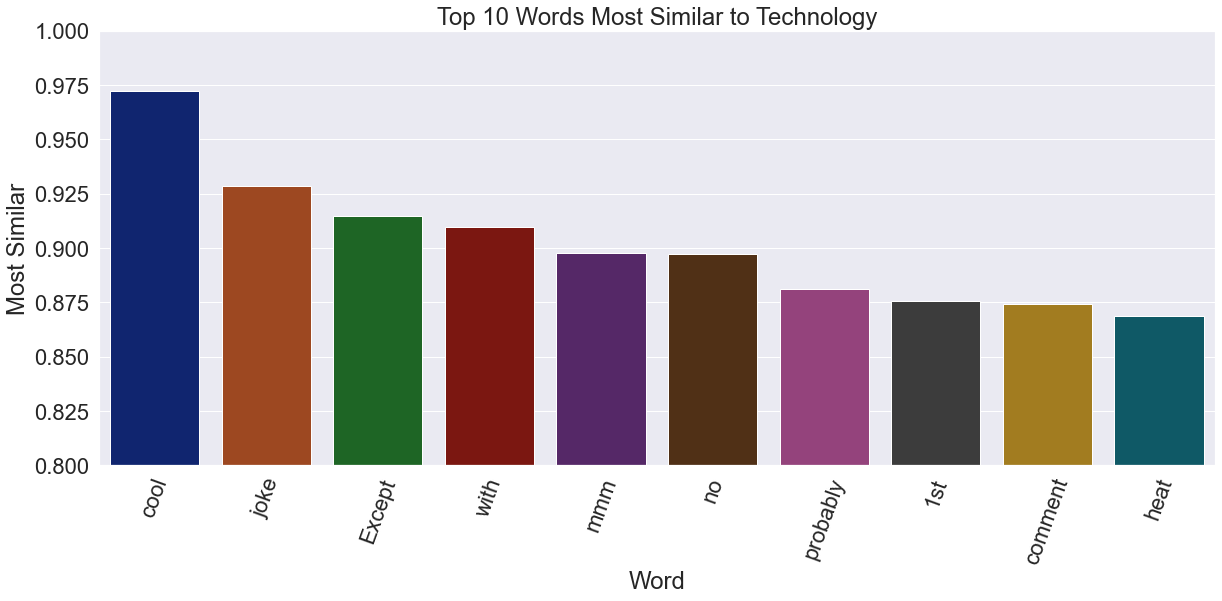

In [132]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=2)
sns.set_style("darkgrid")
palette = sns.set_palette("dark")
ax = sns.barplot(x=df_tech.head(10)[0], y=df_tech.head(10)[1], 
                 palette=palette)
ax.set(xlabel="Word",ylabel="Most Similar")
plt.ticklabel_format(style='plain',axis='y')
plt.ylim(.8,1)
plt.xticks(rotation=70)
plt.title('Top 10 Words Most Similar to Technology')
plt.show()

In [133]:
df_google = pd.DataFrame(wv.most_similar(positive=['google']))
df_google

,0,1
0,maps,0.929473
1,failing,0.922450
2,mobile,0.911939
3,Shout,0.893278
4,cause,0.893064
5,Pearl,0.892217
6,speaking,0.890346
7,pandora,0.887791
8,smartphone,0.884425
9,150,0.884131


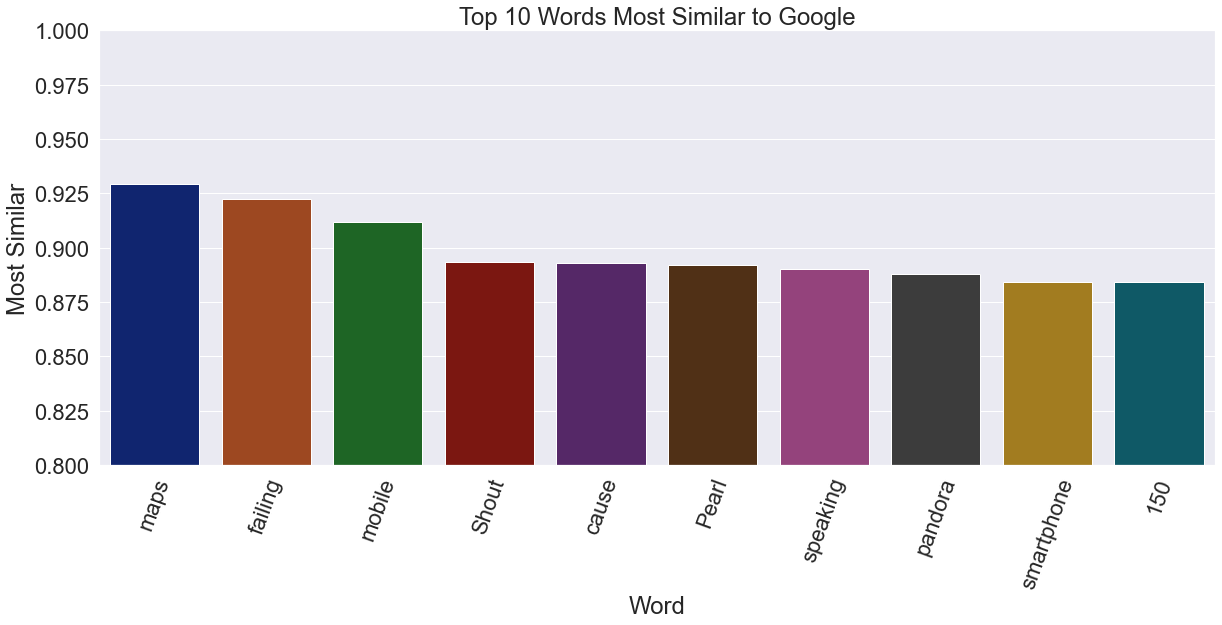

In [134]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=2)
sns.set_style("darkgrid")
palette = sns.set_palette("dark")
ax = sns.barplot(x=df_google.head(10)[0], y=df_google.head(10)[1], 
                 palette=palette)
ax.set(xlabel="Word",ylabel="Most Similar")
plt.ticklabel_format(style='plain',axis='y')
plt.ylim(.8,1)
plt.xticks(rotation=70)
plt.title('Top 10 Words Most Similar to Google')
plt.show()

In [135]:
df_apple = pd.DataFrame(wv.most_similar(positive=['apple']))
df_apple

,0,1
0,Where,0.920323
1,hook,0.910789
2,comes,0.891961
3,scheduling,0.888684
4,campus,0.873725
5,short,0.872290
6,downstairs,0.854347
7,igottagetit,0.852043
8,drag,0.850543
9,xD,0.843549


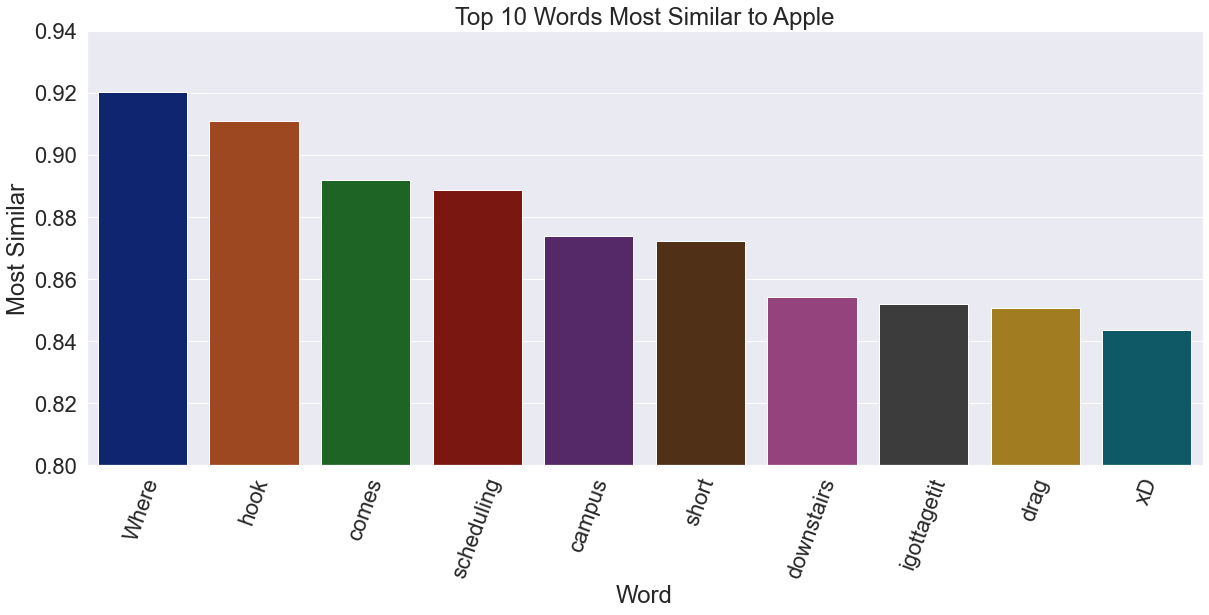

In [136]:
fig_dims = (20,8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.set(font_scale=2)
sns.set_style("darkgrid")
palette = sns.set_palette("dark")
ax = sns.barplot(x=df_apple.head(10)[0], y=df_apple.head(10)[1], palette=palette)
ax.set(xlabel="Word",ylabel="Most Similar")
plt.ticklabel_format(style='plain',axis='y')
plt.ylim(.8,.94)
plt.xticks(rotation=70)
plt.title('Top 10 Words Most Similar to Apple')
plt.show()

In [137]:
import nltk
nltk.download('vader_lexicon')

import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import random
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical
from sklearn import preprocessing
from keras.preprocessing.text import Tokenizer
from keras import models
from keras import layers
from keras import optimizers

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\josep\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


## Keras NN Multiple Classification

In [138]:
df = pd.read_csv('Tweet.csv')
df_up = pd.read_csv('Upsampled.csv')

In [139]:
df = df.drop(columns='Unnamed: 0')

In [140]:
df.head(5) # normal 

,Tweet,Platform,Emotion,Positive_Bin
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,0
1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,1
2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,1
3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,0
4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,1


In [141]:
df_up = df_up.drop(columns='Unnamed: 0')

In [142]:
df_up.head(5) # upsampled for increased number of negative tweets

,Tweet,Platform,Emotion,Positive_Bin
0,At #sxsw #tapworthy iPad Design Headaches - av...,iPad,Negative emotion,0
1,RT @mention Part of Journalsim is the support ...,NaN,Negative emotion,0
2,Fuck the iphone! RT @mention New #UberSocial f...,iPhone,Negative emotion,0
3,#SXSW 2011: Novelty of iPad news apps fades fa...,iPad,Negative emotion,0
4,New #SXSW rule: no more ooing and ahing over y...,iPad,Negative emotion,0


In [143]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3548 entries, 0 to 3547
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tweet         3548 non-null   object
 1   Platform      3191 non-null   object
 2   Emotion       3548 non-null   object
 3   Positive_Bin  3548 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 111.0+ KB


In [144]:
df_up.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3500 entries, 0 to 3499
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Tweet         3500 non-null   object
 1   Platform      3171 non-null   object
 2   Emotion       3500 non-null   object
 3   Positive_Bin  3500 non-null   int64 
dtypes: int64(1), object(3)
memory usage: 109.5+ KB


In [145]:
df_up['Positive_Bin'].value_counts()

1    2500
0    1000
Name: Positive_Bin, dtype: int64

### VADER Sentiment Analysis

In [146]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [147]:
sid = SentimentIntensityAnalyzer()

In [148]:
df_up['scores'] = df_up['Tweet'].apply(lambda review:sid.polarity_scores(review))

In [149]:
df_up['compound'] = df_up['scores'].apply(lambda d:d['compound'])

In [150]:
df_up['comp_score'] = df_up['compound'].apply(lambda score: 1 
                                              if score >= 0 else 0)

In [151]:
df_up.head()

,Tweet,Platform,Emotion,Positive_Bin,scores,compound,comp_score
0,At #sxsw #tapworthy iPad Design Headaches - av...,iPad,Negative emotion,0,"{'neg': 0.153, 'neu': 0.764, 'pos': 0.083, 'co...",-0.2732,0
1,RT @mention Part of Journalsim is the support ...,NaN,Negative emotion,0,"{'neg': 0.0, 'neu': 0.63, 'pos': 0.37, 'compou...",0.8796,1
2,Fuck the iphone! RT @mention New #UberSocial f...,iPhone,Negative emotion,0,"{'neg': 0.166, 'neu': 0.834, 'pos': 0.0, 'comp...",-0.5848,0
3,#SXSW 2011: Novelty of iPad news apps fades fa...,iPad,Negative emotion,0,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,1
4,New #SXSW rule: no more ooing and ahing over y...,iPad,Negative emotion,0,"{'neg': 0.083, 'neu': 0.83, 'pos': 0.087, 'com...",0.0258,1


In [152]:
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix, plot_confusion_matrix

In [153]:
acc_score = accuracy_score(df_up['Positive_Bin'],df_up['comp_score'])

In [154]:
print('Accuracy Score: ', "{:.3f}".format(acc_score*100),"%")

Accuracy Score:  75.371 %


In [155]:
print(classification_report(df_up['Positive_Bin'],df_up['comp_score']))

              precision    recall  f1-score   support

           0       0.61      0.39      0.47      1000
           1       0.79      0.90      0.84      2500

    accuracy                           0.75      3500
   macro avg       0.70      0.64      0.66      3500
weighted avg       0.74      0.75      0.73      3500



### VADER Confusion Matrix

In [156]:
confusion_matrix(df_up['Positive_Bin'],df_up['comp_score'])

array([[ 389,  611],
       [ 251, 2249]], dtype=int64)

#### VADER doesn't do a great job of correctly classifying tweet sentiment, with 611 false positive tweets that are actually negative

In [157]:
full_df = pd.read_csv('Full_DF')

In [158]:
full_df.head()

,Unnamed: 0,Tweet,Platform,Emotion,Uncertain,Negative,No Emotion,Positive
0,0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,0,1,0,0
1,1,@jessedee Know about @fludapp ? Awesome iPad/i...,iPad or iPhone App,Positive emotion,0,0,0,1
2,2,@swonderlin Can not wait for #iPad 2 also. The...,iPad,Positive emotion,0,0,0,1
3,3,@sxsw I hope this year's festival isn't as cra...,iPad or iPhone App,Negative emotion,0,1,0,0
4,4,@sxtxstate great stuff on Fri #SXSW: Marissa M...,Google,Positive emotion,0,0,0,1


In [159]:
full_df = full_df.drop(columns='Unnamed: 0')

In [160]:
full_df.head(10)
full_df = full_df.dropna()

### Tokenize Tweets

In [161]:
tweets = full_df['Tweet']
tokenizer = Tokenizer(num_words=5000)
tokenizer.fit_on_texts(tweets)
sequences = tokenizer.texts_to_sequences(tweets)
print('sequences type: ' , type(sequences))

sequences type:  <class 'list'>


In [162]:
one_hot_results = tokenizer.texts_to_matrix(tweets, mode='binary')
print('one_hot_results type:', type(one_hot_results))

one_hot_results type: <class 'numpy.ndarray'>


In [163]:
word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index)) 

Found 5963 unique tokens.


In [164]:
# Our coded data
print('Dimensions of our coded results:', np.shape(one_hot_results)) 

Dimensions of our coded results: (3291, 5000)


In [165]:
print(y.shape)
print(one_hot_results.shape)

(3500,)
(3291, 5000)


In [166]:
emotion = full_df['Emotion']

# Initialize
le = preprocessing.LabelEncoder() 
le.fit(emotion)
print('Original class labels:')
print(list(le.classes_))
print('\n')
emotion_cat = le.transform(emotion)  

# If you wish to retrieve the original descriptive labels post production
# list(le.inverse_transform([0, 1, 3, 3, 0, 6, 4])) 

print('New product labels:')
print(emotion_cat)
print('\n')

# Each row will be all zeros except for the category for that observation 
print('One hot labels; 4 binary columns, one for each of the categories.') 
product_onehot = to_categorical(emotion_cat)
print(product_onehot)
print('\n')

print('One hot labels shape:')
print(np.shape(product_onehot))

Original class labels:
["I can't tell", 'Negative emotion', 'No emotion toward brand or product', 'Positive emotion']


New product labels:
[1 3 3 ... 1 3 3]


One hot labels; 4 binary columns, one for each of the categories.
[[0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 ...
 [0. 1. 0. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


One hot labels shape:
(3291, 4)


In [167]:
random.seed(42)
test_index = random.sample(range(1,3200), 1500)

test = one_hot_results[test_index]
train = np.delete(one_hot_results, test_index, 0)

label_test = product_onehot[test_index]
label_train = np.delete(product_onehot, test_index, 0)

print('Test label shape:', np.shape(label_test))
print('Train label shape:', np.shape(label_train))
print('Test shape:', np.shape(test))
print('Train shape:', np.shape(train))

Test label shape: (1500, 4)
Train label shape: (1791, 4)
Test shape: (1500, 5000)
Train shape: (1791, 5000)


### Build Neural Network Model

In [168]:
from keras.layers import Input, Dense, LSTM, Embedding
from keras.layers import Dropout, Activation, Bidirectional, GlobalMaxPool1D
from keras.models import Sequential

In [169]:
# Initialize  and build a sequential model
model = models.Sequential()
# Two layers with relu activation
model.add(layers.Dense(50, activation='relu', input_shape=(5000,)))
model.add(layers.Dense(25, activation='relu'))
model.add(layers.Dense(4, activation='softmax'))
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['acc'])

### Run Model

In [170]:
history = model.fit(train,
                    label_train,
                    epochs=20,
                    batch_size=32,
                    validation_split=.2)

Epoch 1/20
45/45 [==============================] - 1s 7ms/step - loss: 1.1797 - acc: 0.6434 - val_loss: 0.6647 - val_acc: 0.8162
Epoch 2/20
45/45 [==============================] - 0s 3ms/step - loss: 0.5406 - acc: 0.8168 - val_loss: 0.6306 - val_acc: 0.8162
Epoch 3/20
45/45 [==============================] - 0s 4ms/step - loss: 0.4077 - acc: 0.8263 - val_loss: 0.6020 - val_acc: 0.8273
Epoch 4/20
45/45 [==============================] - 0s 3ms/step - loss: 0.2787 - acc: 0.9228 - val_loss: 0.5894 - val_acc: 0.8329
Epoch 5/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1811 - acc: 0.9481 - val_loss: 0.5970 - val_acc: 0.8162
Epoch 6/20
45/45 [==============================] - 0s 4ms/step - loss: 0.1098 - acc: 0.9646 - val_loss: 0.6443 - val_acc: 0.8357
Epoch 7/20
45/45 [==============================] - 0s 4ms/step - loss: 0.0641 - acc: 0.9808 - val_loss: 0.6670 - val_acc: 0.8301
Epoch 8/20
45/45 [==============================] - 0s 3ms/step - loss: 0.0338 - acc: 0.99

In [171]:
history_dict = history.history

In [172]:
history_dict.keys()

dict_keys(['loss', 'acc', 'val_loss', 'val_acc'])

### Training and Validation Graphs

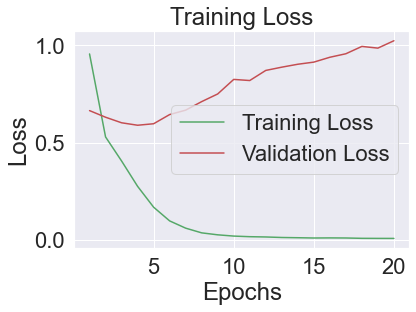

In [173]:
history_dict = history.history
loss_values = history_dict['loss']
loss_valid = history_dict['val_loss']

epochs = range(1, len(loss_values) + 1)

plt.plot(epochs, loss_values, 'g', label='Training Loss')
plt.plot(epochs, loss_valid, 'r', label='Validation Loss')
plt.title('Training Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

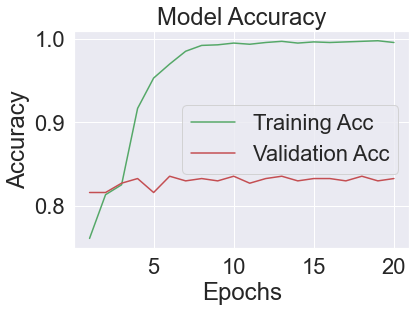

In [174]:
# Plot the training accuracy vs the number of epochs

acc_values = history_dict['acc'] 
acc_valid = history_dict['val_acc'] 

plt.figure()

plt.plot(epochs, acc_values, 'g', label='Training Acc')
plt.plot(epochs, acc_valid, 'r', label='Validation Acc')
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(loc='right')
plt.show()

In [175]:
# Output (probability) predictions for the test set 
y_hat_test = model.predict(test) 

In [176]:
# Print the loss and accuracy for the training set 
results_train = model.evaluate(train, label_train)
results_train

56/56 [==============================] - 0s 2ms/step - loss: 0.2092 - acc: 0.9654


[0.20923849940299988, 0.96538245677948]

In [179]:
results_test = model.evaluate(test, label_test)
results_test # model predicts on the test data with almost 84% accuracy. 

47/47 [==============================] - 0s 2ms/step - loss: 0.8503 - acc: 0.8393


[0.8503161668777466, 0.8393333554267883]

## Question 1 and Recommendation

### In tweets targeting either the iPhone or Android phones, which product is more often the subject of negatively charged emotions?

In [120]:
df_neg = pd.read_csv('Full_DF')
df_neg = df_neg.drop(columns='Unnamed: 0')

In [121]:
df_neg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9093 entries, 0 to 9092
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Tweet       9092 non-null   object
 1   Platform    3291 non-null   object
 2   Emotion     9093 non-null   object
 3   Uncertain   9093 non-null   int64 
 4   Negative    9093 non-null   int64 
 5   No Emotion  9093 non-null   int64 
 6   Positive    9093 non-null   int64 
dtypes: int64(4), object(3)
memory usage: 497.4+ KB


In [122]:
df_grouped = df_neg.groupby(by=df_neg['Platform']).sum()

In [123]:
df_grouped.index

Index(['Android', 'Android App', 'Apple', 'Google',
       'Other Apple product or service', 'Other Google product or service',
       'iPad', 'iPad or iPhone App', 'iPhone'],
      dtype='object', name='Platform')

In [124]:
df_grouped

,Uncertain,Negative,No Emotion,Positive
Platform,,,,
Android,0,8,1,69
Android App,0,8,1,72
Apple,2,95,21,543
Google,1,68,15,346
Other Apple product or service,0,2,1,32
Other Google product or service,1,47,9,236
iPad,4,125,24,793
iPad or iPhone App,0,63,10,397
iPhone,1,103,9,184


In [125]:
# separate tweets
df_android = df_grouped.loc[df_grouped.index =='Android']
df_iphone = df_grouped.loc[df_grouped.index =='iPhone']

In [126]:
df_android

,Uncertain,Negative,No Emotion,Positive
Platform,,,,
Android,0,8,1,69


In [127]:
percent_negative_android_tweets = df_android['Negative']/sum(df_android['Positive'],df_android['Negative'])

In [128]:
print("Percentage of tweets targeting Android phones that are negative: {:.3f}".format(percent_negative_android_tweets[0]*100),"%")

Percentage of tweets targeting Android phones that are negative: 10.390 %


In [129]:
labels1 = 'Negative', 'Positive', 'No Emotion'
sizes1 = [8, 69, 1]

### Negative Tweets

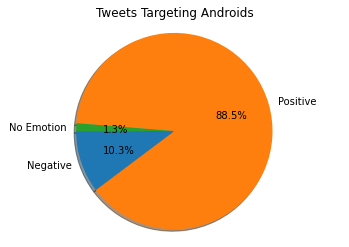

In [130]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes1, labels=labels1, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Tweets Targeting Androids")

plt.show()

In [131]:
df_iphone

,Uncertain,Negative,No Emotion,Positive
Platform,,,,
iPhone,1,103,9,184


In [132]:
percent_negative_iphone_tweets = df_iphone['Negative']/sum(df_iphone['Negative'],df_iphone['Positive'])

In [133]:
print("Percentage of tweets targeting iPhones that are negative: {:.3f}".format(percent_negative_iphone_tweets[0]*100),"%")

Percentage of tweets targeting iPhones that are negative: 35.889 %


In [134]:
sizes2 = [103, 184, 9, 1]
labels2 = 'Negative', 'Positive', 'No Emotion', 'Uncertain'

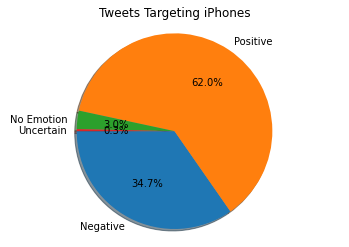

In [135]:
fig1, ax1 = plt.subplots()
ax1.pie(sizes2, labels=labels2, autopct='%1.1f%%',
        shadow=True, startangle=180)
ax1.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Tweets Targeting iPhones")

plt.show()

### Recommendation

#### In creating your phone, more users may want the option to have a more customizable user interface which the Android provides. We will need to look into more detail about what negative words users are including in their negative tweets that target iPhones to specifically determine users' complaints.

## Question 2 and Recommendation

### What words are most common in negative tweets about iPhones and Android phones?

### Negative Android Sentiment

In [136]:
# collect all negative tweets for each product
df_neg_android = df_neg.loc[df_neg['Platform'] =='Android']
df_neg_iphone = df_neg.loc[df_neg['Platform'] =='iPhone']

In [137]:
df_neg_android = df_neg_android.loc[df_neg_android['Negative'] == 1]

In [138]:
df_neg_android # tweets about Android that are negative - create bag of words Android

,Tweet,Platform,Emotion,Uncertain,Negative,No Emotion,Positive
350,they took away the lego pit but replaced it wi...,Android,Negative emotion,0,1,0,0
1940,Why does all the #Android meetups here in #Aus...,Android,Negative emotion,0,1,0,0
1999,@mention Android needs a way to group apps lik...,Android,Negative emotion,0,1,0,0
3389,Lunch with @mention at #CNNGrill. View from th...,Android,Negative emotion,0,1,0,0
4865,Excited to meet the @mention at #sxsw so I can...,Android,Negative emotion,0,1,0,0
8053,Spending some time this morning resetting my a...,Android,Negative emotion,0,1,0,0
8258,Is it just me or has the @mention client for A...,Android,Negative emotion,0,1,0,0
8801,Auntie's voxpop of popular #sxsw apps is wort...,Android,Negative emotion,0,1,0,0


In [139]:
corpus_android = list(df_neg_android['Tweet'])

In [140]:
corpus_android[:10] # entirety of negative android tweets

['they took away the lego pit but replaced it with a recharging station ;) #sxsw and i might check prices for an iphone - crap samsung android',
 "Why does all the #Android meetups here in #Austin are when I'm at work. Well at least there is the PS meetup #sxsw",
 '@mention Android needs a way to group apps like you can now do with iPad/iPod. #SXSW #hhrs',
 'Lunch with @mention at #CNNGrill. View from the HTML5 dev trenches: Android is painful, iOS is sleek (for what @mention is doing) #sxsw',
 'Excited to meet the @mention at #sxsw so I can show them my Sprint Galaxy S still running Android 2.1.   #fail',
 'Spending some time this morning resetting my android phone.  First day of #sxsw was too much for it.',
 'Is it just me or has the @mention client for Android gotten really buggy lately? #SXSW to blame?',
 "Auntie's voxpop of  popular #sxsw apps is worth a watch: {link} Not many Android phones on view."]

In [141]:
# tokenize
android_tokens = word_tokenize(','.join(str(v) for v in corpus_android))

# remove stopwords
stopped_android_tokens = [word.lower() for word in android_tokens if word.lower() 
                          not in stopword_list]

In [142]:
freq = FreqDist(stopped_android_tokens)

In [143]:
freq.most_common(25)

[('android', 8),
 ('apps', 2),
 ('view', 2),
 ('took', 1),
 ('away', 1),
 ('lego', 1),
 ('pit', 1),
 ('replaced', 1),
 ('recharging', 1),
 ('station', 1),
 ('check', 1),
 ('prices', 1),
 ('iphone', 1),
 ('crap', 1),
 ('samsung', 1),
 ('meetups', 1),
 ('austin', 1),
 ('work', 1),
 ('ps', 1),
 ('meetup', 1),
 ('needs', 1),
 ('way', 1),
 ('group', 1),
 ('like', 1),
 ('ipad/ipod', 1)]

### Negative iPhone Sentiment

In [144]:
df_neg_iphone = df_neg_iphone.loc[df_neg_iphone['Negative'] == 1]

In [145]:
df_neg_iphone # tweets about iphone that are negative - create bag of words iphone

,Tweet,Platform,Emotion,Uncertain,Negative,No Emotion,Positive
0,.@wesley83 I have a 3G iPhone. After 3 hrs twe...,iPhone,Negative emotion,0,1,0,0
17,I just noticed DST is coming this weekend. How...,iPhone,Negative emotion,0,1,0,0
92,What !?!? @mention #SXSW does not provide iPh...,iPhone,Negative emotion,0,1,0,0
233,"If iPhone alarms botch the timechange, how man...",iPhone,Negative emotion,0,1,0,0
236,I meant I also wish I at #SXSW #dyac stupid i...,iPhone,Negative emotion,0,1,0,0
...,...,...,...,...,...,...,...
8610,iPhone battery is going quickly. Guy behind me...,iPhone,Negative emotion,0,1,0,0
8675,We're so ungrateful bc we have too much shit t...,iPhone,Negative emotion,0,1,0,0
8819,Dear #SXSW goer... Please look up from your fu...,iPhone,Negative emotion,0,1,0,0
8820,"This #SXSW I am grateful for: my bicycle, havi...",iPhone,Negative emotion,0,1,0,0


In [93]:
corpus_iphone = list(df_neg_iphone['Tweet'])

In [104]:
corpus_iphone[:15]

['.@wesley83 I have a 3G iPhone. After 3 hrs tweeting at #RISE_Austin, it was dead!  I need to upgrade. Plugin stations at #SXSW.',
 'I just noticed DST is coming this weekend. How many iPhone users will be an hour late at SXSW come Sunday morning? #SXSW #iPhone',
 "What !?!? @mention  #SXSW does not provide iPhone chargers?!?  I've changed my mind about going next year!",
 "If iPhone alarms botch the timechange, how many #SXSW'ers freak? Late to flights, missed panels, behind on bloody marys...",
 'I meant I also wish I  at #SXSW #dyac stupid iPhone!',
 'Overheard at #sxsw interactive: &quot;Arg! I hate the iphone! I want my blackberry back&quot; #shocked',
 "overheard at MDW (and I'll second it) &quot;halfway through my iPhone battery already and I haven't even boarded the plane to #sxsw&quot; #amateurhour",
 "My iPhone battery can't keep up with my tweets! Thanks Apple.  #SXSW  #precommerce",
 'IPhone is dead. Find me on the secret batphone #sxsw.',
 'Austin is getting full, and #SX

In [94]:
# tokenize
iphone_tokens = word_tokenize(','.join(str(v) for v in corpus_iphone))

# remove stopwords
stopped_iphone_tokens = [word.lower() for word in iphone_tokens if word.lower() 
                          not in stopword_list]

In [97]:
freq = FreqDist(stopped_iphone_tokens)

In [98]:
freq.most_common(25)

[('iphone', 104),
 ('quot', 22),
 ('battery', 15),
 ('amp', 10),
 ('blackberry', 8),
 ('link', 8),
 ('austin', 7),
 ('app', 7),
 ('users', 6),
 ('going', 6),
 ('time', 6),
 ('sxsw.', 5),
 ('like', 5),
 ('u', 5),
 ('good', 5),
 ('3g', 4),
 ('hour', 4),
 ('apple', 4),
 ('people', 4),
 ('know', 4),
 ('ipad', 4),
 ('t-mobile', 4),
 ('shit', 4),
 ('long', 4),
 ('technology', 4)]

### Recommendation

##### The Android operating system was claimed to be buggy in addition to someone saying Android is painful and not sleek like Apple's iOS. Generally, users had less negative things to say as a percentage of total comments.
##### The iPhone was said to have failing battery or a battery charge that does not last long enough when the phone is in operation. Additionally, lack of signal became a problem in crowded areas but this is not typically a phone design issue but instead is an infrastructure problem. 
##### Build a sleek phone with a simple to use Graphical User Interface. Have plenty of battery to power the phone for longer periods. Users would enjoy a feature like a backup battery, or a sleekly designed case that provides a full second charge without adding much volume.

## Question 3 and Recommendation

### What are some of the positive features commented about for both iPhones and Android phones?

In [146]:
df_pos = pd.read_csv('Full_DF')

In [147]:
df_pos_android = df_pos.loc[df_pos['Platform'] =='Android']
df_pos_iphone = df_pos.loc[df_pos['Platform'] =='iPhone']

In [148]:
df_pos_android = df_pos_android.loc[df_pos_android['Positive']==1]
df_pos_iphone = df_pos_iphone.loc[df_pos_iphone['Positive']==1]

### Positive Android Sentiment

In [149]:
corpus_android = list(df_pos_android['Tweet'])

In [159]:
corpus_android[:20]

['#SXSW is just starting, #CTIA is around the corner and #googleio is only a hop skip and a jump from there, good time to be an #android fan',
 'Excited to meet the @samsungmobileus at #sxsw so I can show them my Sprint Galaxy S still running Android 2.1.   #fail',
 'This is a #WINNING picture #android #google #sxsw {link}',
 "I knew if I plied @mention with beer and stogies last night I'd weasel my way into the Team Android party tonight. #success #SXSW.",
 'Alert the media.  I just saw the one and only Android tablet at #sxsw.  Like finding a needle in a haystack!  I also saw a Cr-48.',
 'Farooqui: Now about mobile. iOS, with Android catching up fast and will grow more once they allow in-app purchasing. #gamesfortv #sxsw',
 'I need to play this game on my #android - #SXSW {link}',
 'Talked to some great developers at the Android meetup. Looking forward to working with them. #sxsw #android #androidsxsw',
 "There are thousands of iPad 2's floating around Austin at #sxsw and I have not 

In [160]:
# tokenize
android_tokens = word_tokenize(','.join(str(v) for v in corpus_android))

# remove stopwords
stopped_android_tokens = [word.lower() for word in android_tokens if word.lower() 
                          not in stopword_list]

In [161]:
freq = FreqDist(stopped_android_tokens)

In [162]:
freq.most_common(25)

[('android', 71),
 ('link', 26),
 ('party', 12),
 ('team', 11),
 ('free', 9),
 ('lustre', 6),
 ('pearl', 6),
 ('amp', 6),
 ('new', 6),
 ('phone', 6),
 ('dev', 5),
 ('tablet', 4),
 ('need', 4),
 ('great', 4),
 ('meetup', 4),
 ('androidsxsw', 4),
 ('market', 4),
 ('win', 4),
 ('love', 4),
 ('details', 4),
 ('starting', 3),
 ('good', 3),
 ('fan', 3),
 ('excited', 3),
 ('beer', 3)]

### Positive iPhone Sentiment

In [163]:
corpus_iphone = list(df_pos_iphone['Tweet'])

In [168]:
corpus_iphone[:20]

["I love my @mention iPhone case from #Sxsw but I can't get my phone out of it #fail",
 'Yai!!! RT @mention New #UberSocial for #iPhone now in the App Store includes UberGuide to #SXSW sponsored by (cont) {link}',
 'Take that #SXSW ! RT @mention Major South Korean director gets $130,000 to make a movie entirely with his iPhone. {link}',
 'Behind on 100s of emails? Give them all 1 line iPhone composed replies. #SXSW #protip',
 'Picked up a Mophie battery case 4 my iPhone in prep for #SXSW. Not lugging around a laptop &amp; only using my phone was a huge win last year.',
 "Do I need any more for #sxsw! ipad, iphone, laptop, dictaphone, vid.camera.... Wow! Love to  meet the REAL 'cerebellum' charged people:)",
 'My iPhone battery at 100%. #winning at #SXSW',
 'BEST SWAG EVER. Thanks @mention My charging iPhone thanks you, too. #SXSW {link}',
 'Love that I have a MacBook, iPad, and iPhone with me at #sxsw this year. One runs out of juice, and I can jump to the next.',
 'Holy cow! I just go

In [165]:
# tokenize
iphone_tokens = word_tokenize(','.join(str(v) for v in corpus_iphone))

# remove stopwords
stopped_iphone_tokens = [word.lower() for word in iphone_tokens if word.lower() 
                          not in stopword_list]

In [166]:
freq = FreqDist(stopped_iphone_tokens)

In [167]:
freq.most_common(25)

[('iphone', 176),
 ('link', 53),
 ('ipad', 17),
 ('quot', 16),
 ('amp', 15),
 ('got', 14),
 ('new', 13),
 ('love', 11),
 ('thanks', 9),
 ('free', 9),
 ('case', 8),
 ('battery', 8),
 ('charger', 8),
 ('zazzlesxsw', 8),
 ('like', 8),
 ('phone', 7),
 ('charging', 7),
 ('w/', 7),
 ('android', 7),
 ('austin', 7),
 ('sxswi', 7),
 ('use', 7),
 ('wow', 6),
 ('best', 6),
 ('year', 6)]

### Recommendation

##### People are happiest when their phones are charged or charging. 
##### The positive Android Tweets are in reference to parties or people just being excited about Android phones and challenging Apple's market share. Words used include party, team, good, win, market, fan, and excited. Individual observations are not about the function of the device but rather about being a part of a new group or trend. 
##### The positive iPhone tweets center on batteries and charging/having a charged phone to be able to use at the music festival in Austin, Texas. Words most often used include case, thanks, free, charger, wow, and best. These observations are more about being able to use iPhone to do anything, including getting funding of $130,000 in order to make a movie with only the camera on an iPhone. 